In [22]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os 
import scipy as stats
from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings('ignore')


In [23]:
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv') #reading the csv file
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [24]:
# In this dataset both categorical and numerical data is present and this is a"Classification type" problem in which we need to increase the attrition of the employees.

In [25]:
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [26]:
#EDA


In [27]:
# checking shape of dataset
df.shape

(1470, 35)

In [28]:
#reading all column names
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [29]:
#checking data types of each feature
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [30]:
#some of the columns in the data are object type and remaining all are integer datatype

In [31]:
# checking info of data-dataset info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [32]:
# Checking unique values in each column
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [33]:
#These are the number of unique values present in each columns.

In [34]:
# Dropping irrelevant columns
df.drop(columns=["EmployeeCount","Over18","StandardHours","EmployeeNumber"], axis=1, inplace=True)

In [35]:
df.shape

(1470, 31)

In [36]:
# checking null values in the dataframe
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [37]:
#There is no missing values present in the dataset.

<AxesSubplot:>

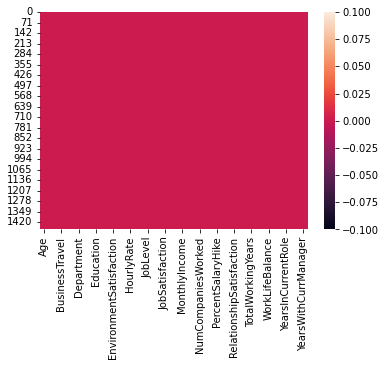

In [38]:
# lets visualize the null values clearly
sns.heatmap(df.isnull())

In [39]:
# Their is no missing values and data is cleaned.


In [40]:
# checking the uniqueness of dataset
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [41]:
#yes means the employees is facing attrition and no means employees are not facing any attrition.

In [42]:
# checcking count of number of employees who stayed and left the company
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [43]:
#237 employees are facing attrition and 1233 are not facing attrition

In [44]:
# checking whether the dataset contains any space
df.loc[df['Attrition']==" "]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [45]:
# So, there are no spaces in the dataset.

In [46]:
# describing the dataset
df.describe()


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [47]:
#there are no missing values and min age of the employee is 18 and max is 60 
#mean is more than the median(50%) and skewed to right and in some median (50%) is more So,they skewes to left
#separating categorical and numerical columns

In [48]:
# checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


In [49]:
# now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)


['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


No     1233
Yes     237
Name: Attrition, dtype: int64


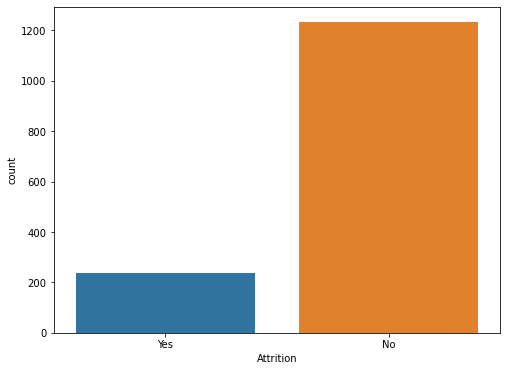

In [50]:
#Data Visualization
#Plotting categorical columns
# visualizing the number of employees who stayed and left the company
print(df["Attrition"].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(df["Attrition"])
plt.show()

In [51]:
#In this few employees facing attrition and data is highly imbalanced

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


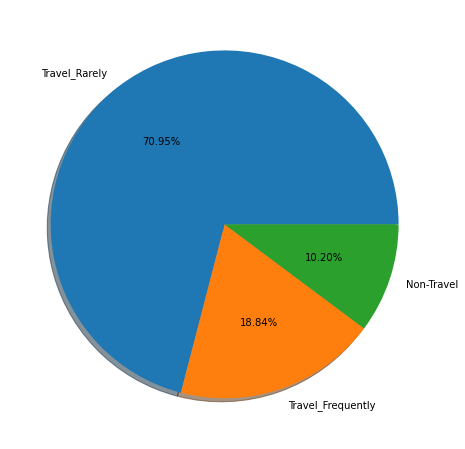

In [52]:
# visualize the count of employeess on the basis of BusinessTravel
print(df["BusinessTravel"].value_counts())
labels='Travel_Rarely','Travel_Frequently','Non-Travel'
fig, ax = plt.subplots(figsize=(12,8))
ax.pie(df['BusinessTravel'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

In [53]:
#The pie plot shows most of the employees travel rarely and few employees travel frequently

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


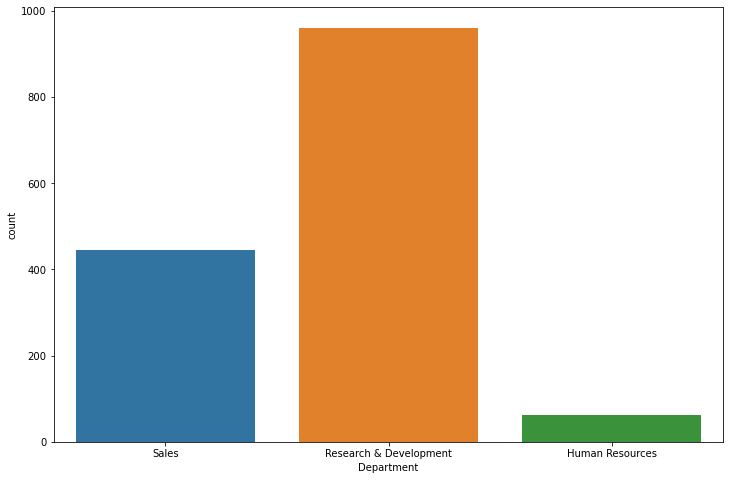

In [54]:
# visualizing count of department where the employees are working
print(df["Department"].value_counts())
plt.figure(figsize=(12,8))
sns.countplot(df["Department"])
plt.show()


In [55]:
#So,Most of the employees belongs to Research&Development department

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


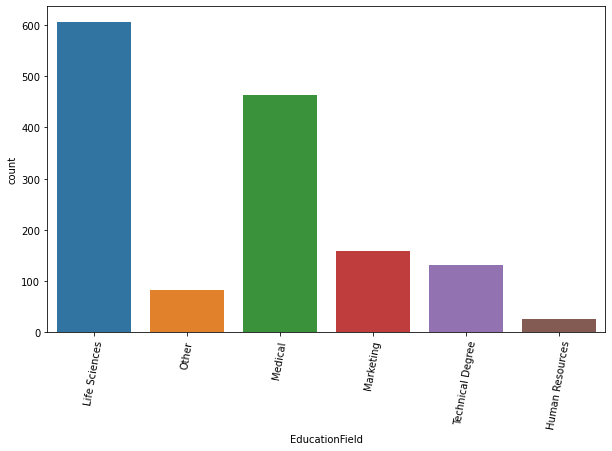

In [56]:
# visualizing count of Educational field of the empoyees
print(df["EducationField"].value_counts())
plt.figure(figsize=(10,6))
sns.countplot(df["EducationField"])
plt.xticks(rotation=80)
plt.show()


In [57]:
#Here are most of the employees are from the Life Sciences background by Medical field and only few employees are from human Resources field.

Male      882
Female    588
Name: Gender, dtype: int64


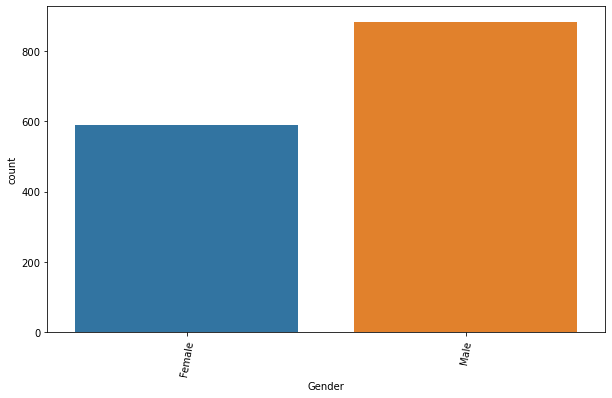

In [58]:
# visualize the countof gender
print(df["Gender"].value_counts())
plt.figure(figsize=(10,6))
sns.countplot(df["Gender"])
plt.xticks(rotation=80)
plt.show()

In [59]:
#it looks like male employees facing the attrition than the female employees

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


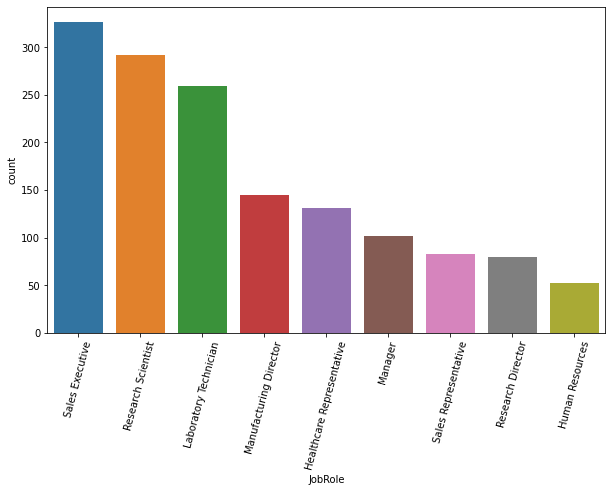

In [60]:
# visualizing count pf jobrole of the employees
print(df["JobRole"].value_counts())
plt.figure(figsize=(10,6))
sns.countplot(df["JobRole"])
plt.xticks(rotation=75)
plt.show()

In [61]:
#In these Sales Executive jobs are more followed by Research Scientist and Laboratory Technician.Human Resources job roles are very less in numbers.

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


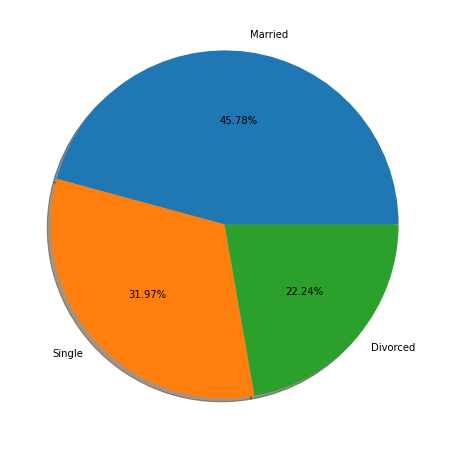

In [62]:
# Visualize the count of marital status of the employees 
print(df["MaritalStatus"].value_counts())
labels='Married','Single','Divorced'
colors = ["4CAF50","hotpink","b"]
fig, ax = plt.subplots(figsize=(12,8))
ax.pie(df['MaritalStatus'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

In [63]:
#This count plot gives the marital status of employees . There are 45% of married employees,32% single and 22% are divorced. so count of married employees are more .

No     1054
Yes     416
Name: OverTime, dtype: int64


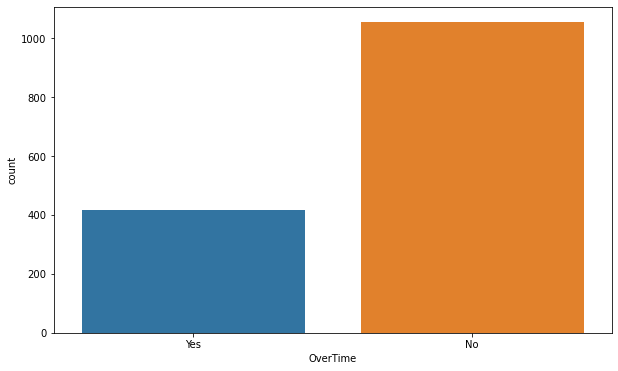

In [64]:
#visualizing  count of overtime of the employees
print(df["OverTime"].value_counts())
plt.figure(figsize=(10,6))
sns.countplot(df["OverTime"])
plt.show()

In [65]:
#1054 employees- work with in the given time and o 416 employees work more than the assigned time.

In [66]:
#Distribution of Skewness
#Plotting numerical columns
numerical_columns=['Age','DailyRate','DistanceFromHome','Education','Environment','']


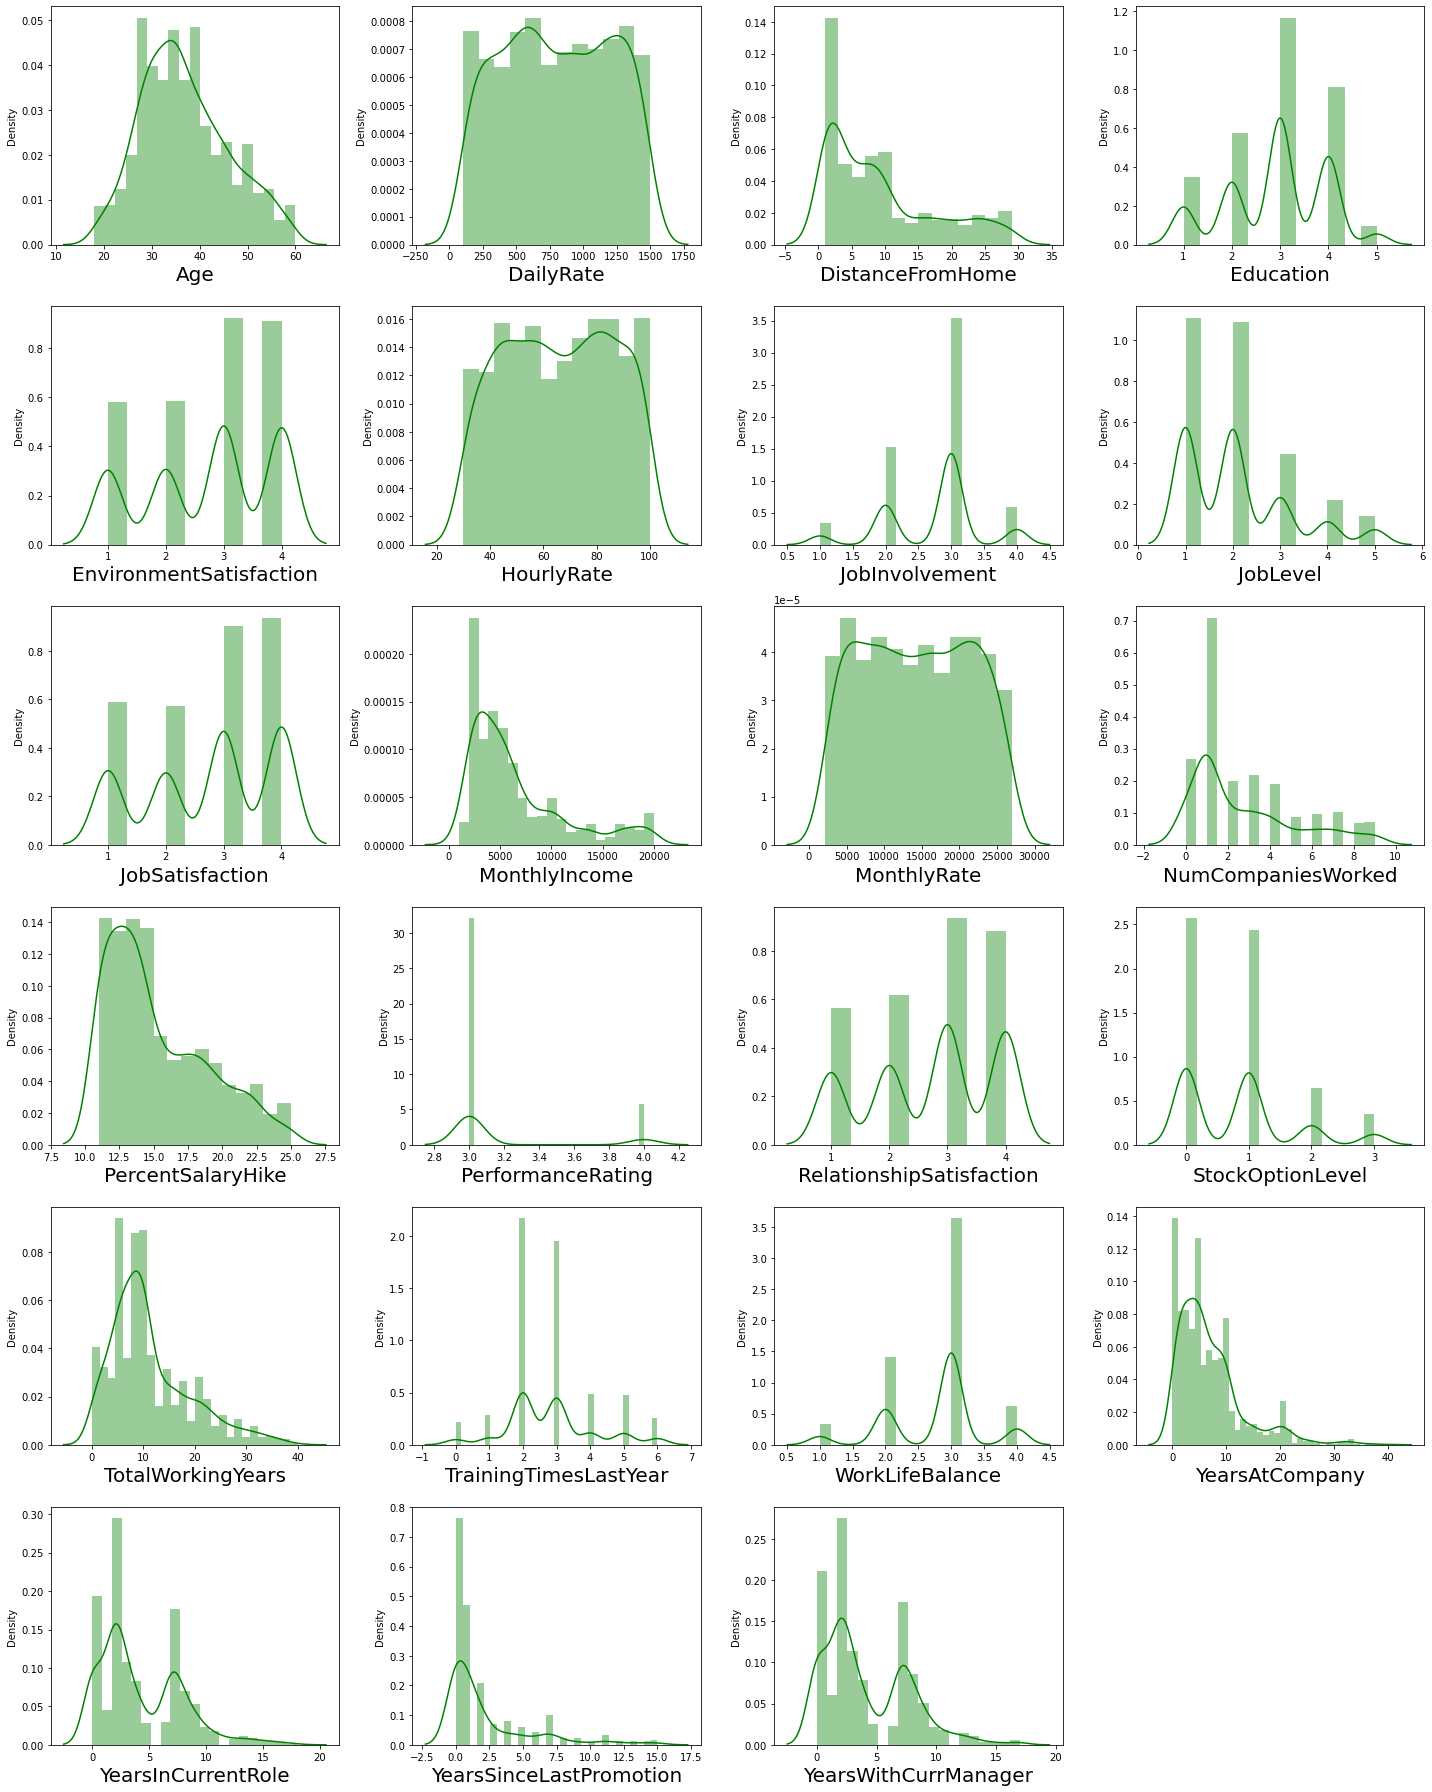

In [67]:
# checking how the data has been distributed in each column

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=24:
        ax=plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],color="green")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [68]:
#Except Age,DailyRate,HourlyRate and MonthlyRate all the other columns in numerical_columns list are skewed

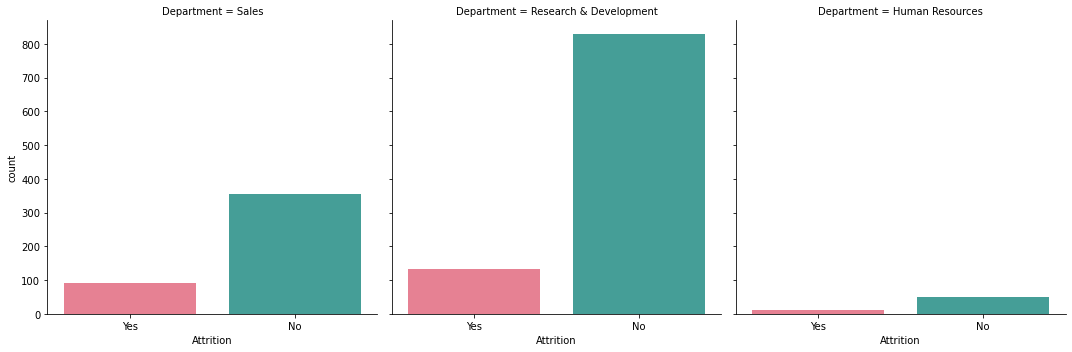

In [69]:
# Department
sns.catplot(x='Attrition',col='Department',data=df,kind='count',palette="husl")

In [70]:
# So, 80% of employees in HR department dont want to leave the organization and only 20% employees wants to leave

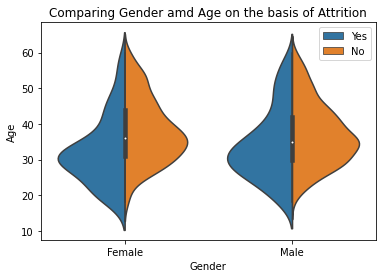

In [71]:
# Gender
#checking how the attrition pays role in gender and age
sns.violinplot(x=df['Gender'],y=df['Age'],hue=df["Attrition"],split=True)
plt.title("Comparing Gender amd Age on the basis of Attrition")
plt.legend()
plt.show()

In [72]:
#female employees of age 30-40 and male employees of age 25-40 dont want to leave the company

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


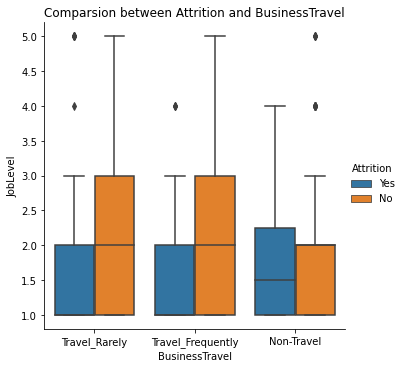

In [73]:
# BusinessTravel

print(df["BusinessTravel"].value_counts())
sns.catplot(x="BusinessTravel",y='JobLevel',data=df,hue="Attrition",kind="box")
plt.title("Comparsion between Attrition and BusinessTravel")
plt.show()

In [74]:
#The employees in joblevel 5 who travel rarely are dont want to leave the organization and the employees in the job level 4 with non business travel are facing attrition.

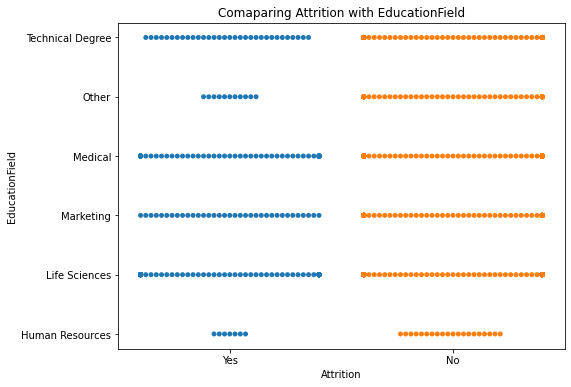

In [75]:
# Checking how the attrition perform according to the employees EducationField
plt.figure(figsize=(8,6))
plt.title("Comaparing Attrition with EducationField")
sns.swarmplot(x=df['Attrition'],y=df['EducationField'],data=df)
plt.show()

In [76]:
# Most of the employees are from Life Sciences background followed by Marketing and Medical

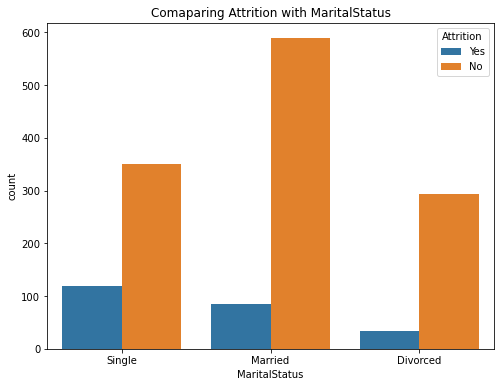

In [77]:
# Checking how the attrition perform according to the employees Maritalstatus
plt.figure(figsize=(8,6))
plt.title("Comaparing Attrition with MaritalStatus")
sns.countplot(x=df['MaritalStatus'],hue=df["Attrition"],data=df)
plt.show()

In [78]:
#The attrition rate is high in singles followed by Married employees

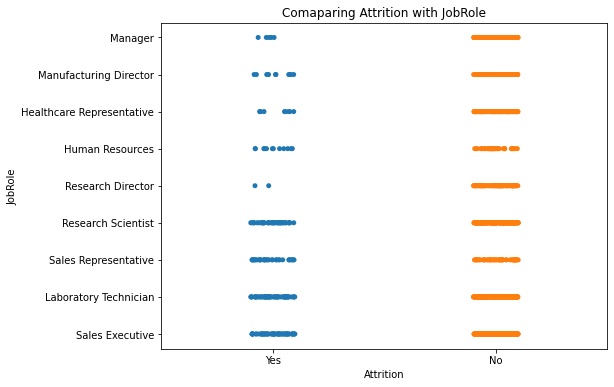

In [79]:
# Checking how the attrition perform according to the employees jobrole
plt.figure(figsize=(8,6))
plt.title("Comaparing Attrition with JobRole")
sns.stripplot(x=df['Attrition'],y=df['JobRole'])
plt.show()


In [80]:
#Most of the employees in joblevel 4 have high percent of "No" attrition and very less percent for attrition "Yes"

In [81]:
#DailyRate and HourlyRate, MonthlyRate and MonthlyIncome

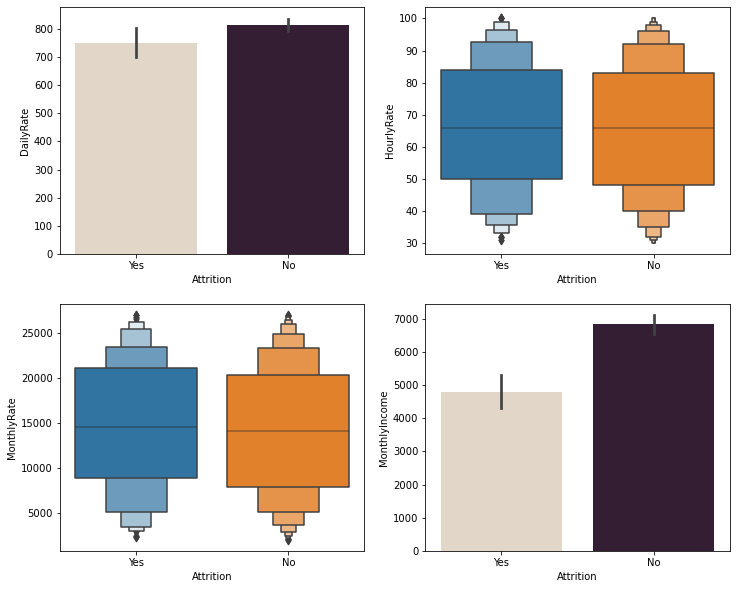

In [82]:
fig,axes=plt.subplots(2,2,figsize=(12,10))

# Checking attrition level in Dailyrate
sns.barplot(x='Attrition',y='DailyRate',ax=axes[0,0],data=df,palette="ch:.25")

# Checking attrition level in hourlyrate
sns.boxenplot(x='Attrition',y='HourlyRate',ax=axes[0,1],data=df)

# Checking attrition level in Monthlyrate
sns.boxenplot(x='Attrition',y='MonthlyRate',ax=axes[1,0],data=df)

# Checking attrition level in Monthlyincome
sns.barplot(x='Attrition',y='MonthlyIncome',ax=axes[1,1],data=df,palette="ch:.25")
plt.show()


In [83]:
#First plot shows that the Employees working with lower daily rate wants to leave the organization
#second plot both Attrition and HourlyRate equal 
#Third plot shows the MonthlyRate for "Yes" is bit higher than "No" attrition.
#Fourth plot, the MonthlyIncome for "No" attrition is quite high than the "Yes" attrition

In [84]:
# Checking the counts of EnvironmentSatisfaction
print(df["EnvironmentSatisfaction"].value_counts())

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64


In [85]:
# Checking the counts of JobInvolvement
print(df["JobInvolvement"].value_counts())

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64


In [86]:
# Checking the counts of JobSatisfaction
print(df["JobSatisfaction"].value_counts())

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64


In [87]:
# Checking the counts of JobSatisfaction
print(df["JobSatisfaction"].value_counts())

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64


3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64


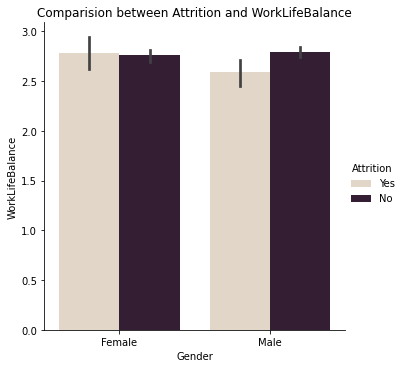

In [88]:
# Checking attrition level in WorkLifeBalance
print(df["WorkLifeBalance"].value_counts())
sns.catplot(x='Gender',y='WorkLifeBalance',data=df,kind="bar",hue='Attrition',palette="ch:.25")
plt.title("Comparision between Attrition and WorkLifeBalance")
plt.show()

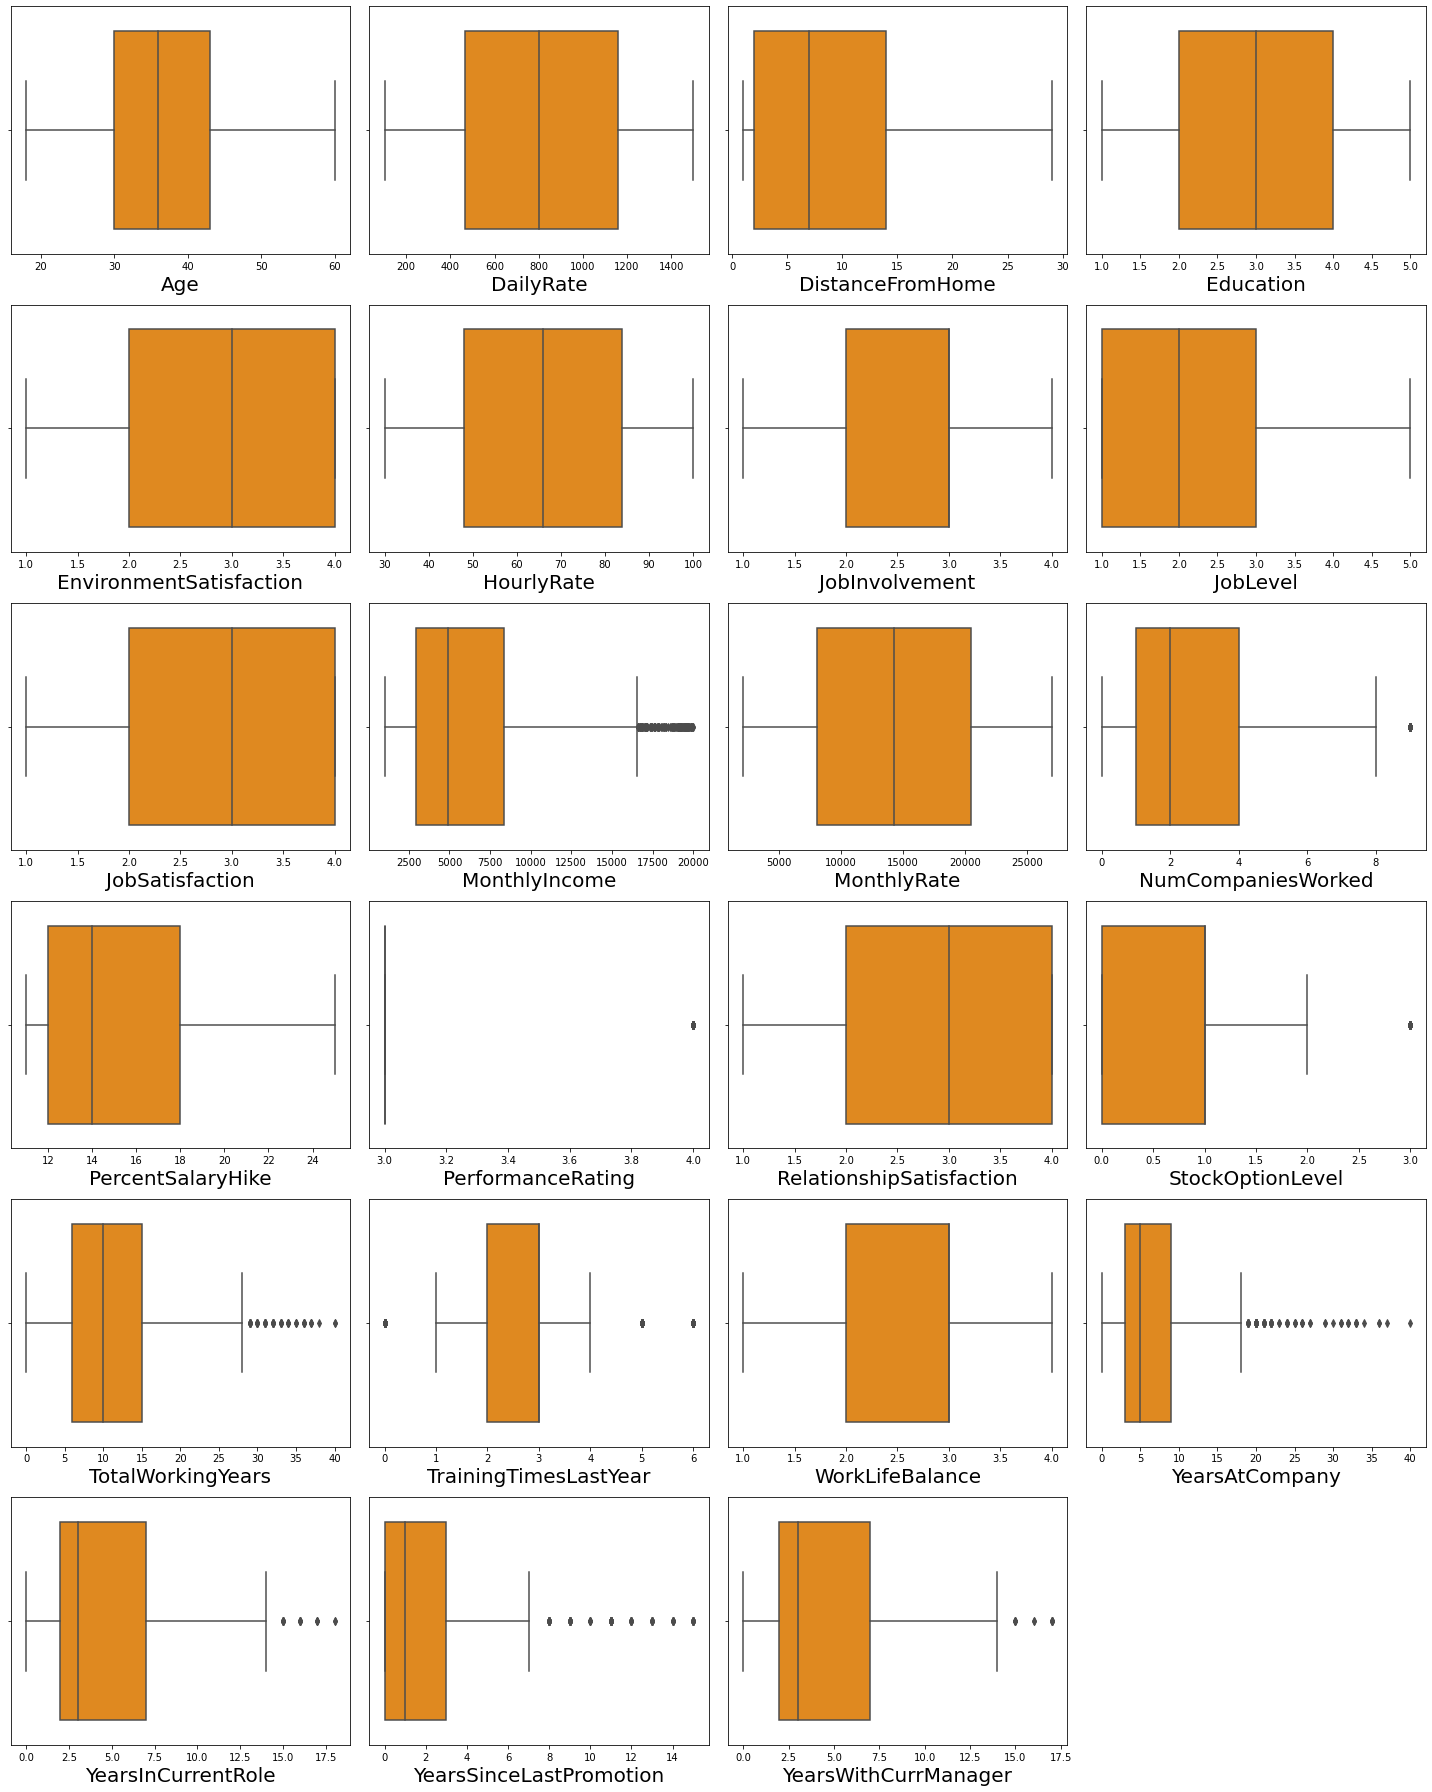

In [89]:
# Identifying the outliers using boxplot

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=24:
        ax=plt.subplot(6,4,plotnumber)
        sns.boxplot(df[column],color="darkorange")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [90]:
# Now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)


['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [91]:
# Features containing outliers
features = df[['MonthlyIncome', 'NumCompaniesWorked', 'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany']]

In [92]:
# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))

z


,MonthlyIncome,NumCompaniesWorked,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany
0,0.108350,2.125136,0.426230,0.932014,0.421642,2.171982,0.164613
1,0.291719,0.678049,2.346151,0.241988,0.164511,0.155707,0.488508
2,0.937654,1.324226,0.426230,0.932014,0.550208,0.155707,1.144294
3,0.763634,0.678049,0.426230,0.932014,0.421642,0.155707,0.161947
4,0.644858,2.525591,0.426230,0.241988,0.678774,0.155707,0.817734
...,...,...,...,...,...,...,...
1465,0.835451,0.523316,0.426230,0.241988,0.735447,0.155707,0.327893
1466,0.741140,0.523316,0.426230,0.241988,0.293077,1.707500,0.001333
1467,0.076690,0.678049,2.346151,0.241988,0.678774,2.171982,0.164613
1468,0.236474,0.277594,0.426230,0.932014,0.735447,0.155707,0.325228


In [93]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)] 
new_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [94]:
# Shape of original dataset
df.shape

(1470, 31)

In [95]:
# Shape of new dataframe
new_df.shape

(1434, 31)

In [96]:
# Checking the the data loss
data_loss = (1470-1387)/1470*100
data_loss

5.646258503401361

In [97]:
#IQR (Inter Quantile Range) method
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [98]:
df1.shape

(812, 31)

In [99]:
# Let's check the dataloss
data_loss = (1470-779)/1470*100
data_loss

47.006802721088434

In [100]:

#using IQR method I am losing 47% of data, so considering Zscore method.

In [101]:

# Checking the skewness
new_df.skew()

Age                         0.431254
DailyRate                  -0.016112
DistanceFromHome            0.958114
Education                  -0.295793
EnvironmentSatisfaction    -0.319538
HourlyRate                 -0.029655
JobInvolvement             -0.503247
JobLevel                    1.073027
JobSatisfaction            -0.339787
MonthlyIncome               1.455145
MonthlyRate                 0.031259
NumCompaniesWorked          1.031988
PercentSalaryHike           0.815397
PerformanceRating           1.925397
RelationshipSatisfaction   -0.299523
StockOptionLevel            0.960450
TotalWorkingYears           0.940101
TrainingTimesLastYear       0.566330
WorkLifeBalance            -0.552331
YearsAtCompany              1.256946
YearsInCurrentRole          0.929946
YearsSinceLastPromotion     2.007415
YearsWithCurrManager        0.858865
dtype: float64

In [102]:
#Removing skewness using yeo-johnson method

skew = ['DistanceFromHome', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')


In [103]:
new_df[skew] = scaler.fit_transform(new_df[skew].values)
new_df[skew].head()

,DistanceFromHome,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,-1.492909,0.293317,0.334657,1.623206,-1.497224,-1.087037,-0.220968,-2.601318,0.170026,0.236634,0.523995
1,0.241252,0.293317,0.096718,-0.570253,1.683644,0.544888,0.091603,0.218828,0.839716,0.917776,0.944624
2,-1.031930,-1.157380,-1.440980,1.273516,0.197593,-1.087037,-0.394268,0.218828,-2.174311,-1.588896,-1.544662
3,-0.701966,-1.157380,-0.840659,-0.570253,-1.497224,-1.087037,-0.220968,0.218828,0.535789,0.917776,-1.544662
4,-1.031930,-1.157380,-0.538154,1.767882,-0.955883,0.544888,-0.582124,0.218828,-0.950177,-0.421144,-0.380409


In [104]:
# Checking skewness after using yeo=johnson ethod
new_df.skew()

Age                         0.431254
DailyRate                  -0.016112
DistanceFromHome           -0.008807
Education                  -0.295793
EnvironmentSatisfaction    -0.319538
HourlyRate                 -0.029655
JobInvolvement             -0.503247
JobLevel                    0.105839
JobSatisfaction            -0.339787
MonthlyIncome               0.030276
MonthlyRate                 0.031259
NumCompaniesWorked          0.015100
PercentSalaryHike           0.115118
PerformanceRating           1.925397
RelationshipSatisfaction   -0.299523
StockOptionLevel            0.087851
TotalWorkingYears          -0.019262
TrainingTimesLastYear       0.058706
WorkLifeBalance            -0.552331
YearsAtCompany             -0.021670
YearsInCurrentRole         -0.058144
YearsSinceLastPromotion     2.007415
YearsWithCurrManager       -0.063332
dtype: float64

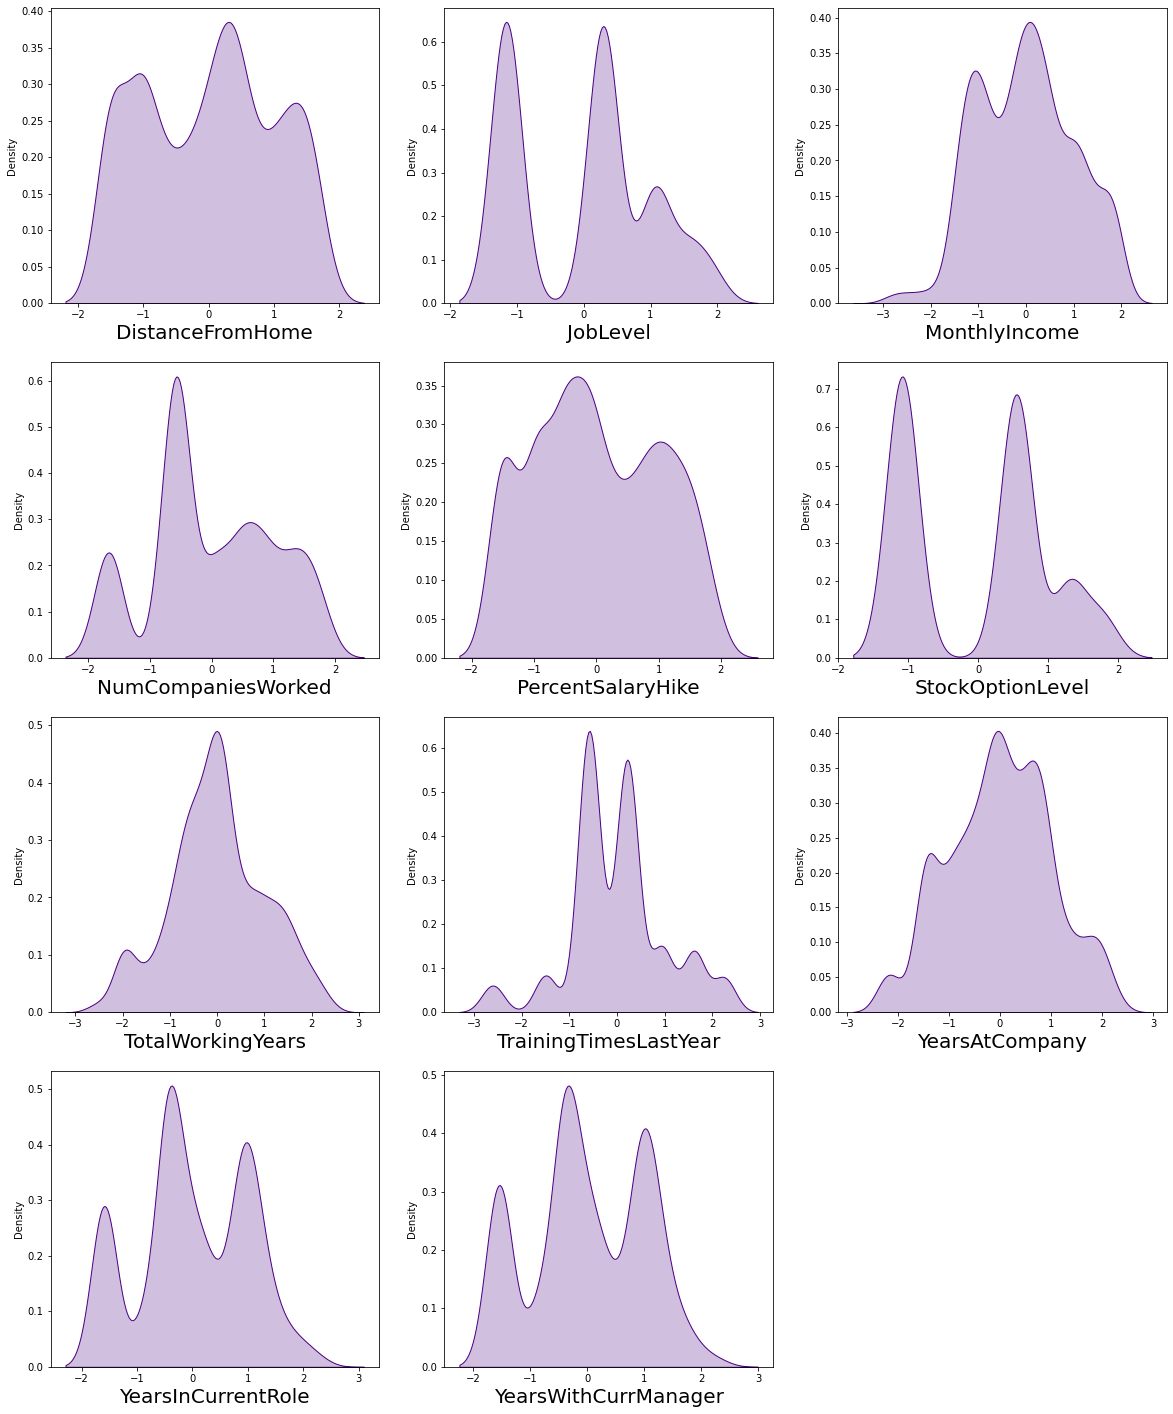

In [105]:
# After removing let's check how the data has been distributed in each column.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in new_df[skew]:
    if plotnumber<=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(new_df[column],color='indigo',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [106]:
#Encoding the categorical columns using Label Encoding


In [107]:
categorical_col = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

In [108]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)

In [109]:
#Correlation between the target variable and independent variables using HEAT map
# Checking the correlation between features and the target
cor = new_df.corr()
cor

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.163270,0.023885,0.030541,-0.030290,-0.023393,0.194283,-0.035490,0.008012,-0.044876,...,-0.000014,0.050074,0.071250,0.646080,-0.012915,-0.015427,0.215878,0.158565,0.168613,0.147793
Attrition,-0.163270,1.000000,-0.003866,-0.052820,0.065087,0.082871,-0.030505,0.022918,-0.107391,0.036980,...,0.006577,-0.051555,-0.179781,-0.220931,-0.064856,-0.066624,-0.201695,-0.189039,-0.034600,-0.185812
BusinessTravel,0.023885,-0.003866,1.000000,-0.004469,-0.005016,-0.012396,-0.002089,0.024651,-0.002231,-0.026832,...,-0.024653,-0.026855,-0.010723,0.035862,0.010064,-0.007906,-0.012297,-0.024165,-0.010440,-0.021862
DailyRate,0.030541,-0.052820,-0.004469,1.000000,0.004798,-0.005315,-0.016922,0.040287,0.024700,-0.011103,...,-0.001164,0.011630,0.039954,0.043854,0.003322,-0.043506,0.004486,0.021559,-0.021039,0.003407
Department,-0.030290,0.065087,-0.005016,0.004798,1.000000,0.033430,0.010328,0.014271,-0.016310,-0.036246,...,-0.038831,-0.029839,-0.010469,-0.004957,0.042819,0.029414,0.025907,0.055954,0.044574,0.021728
DistanceFromHome,-0.023393,0.082871,-0.012396,-0.005315,0.033430,1.000000,0.010704,0.009894,-0.009192,0.008160,...,0.007197,0.006308,0.022590,-0.007671,-0.020151,-0.025054,0.010959,0.016253,0.000729,0.009038
Education,0.194283,-0.030505,-0.002089,-0.016922,0.010328,0.010704,1.000000,-0.036102,-0.031009,-0.025472,...,-0.031823,-0.007024,0.023195,0.148082,-0.026880,0.005539,0.038507,0.047075,0.038017,0.034623
EducationField,-0.035490,0.022918,0.024651,0.040287,0.014271,0.009894,-0.036102,1.000000,0.045463,0.004696,...,-0.005128,-0.010652,-0.021295,-0.013657,0.048130,0.043286,-0.003556,0.002502,0.009248,0.016764
EnvironmentSatisfaction,0.008012,-0.107391,-0.002231,0.024700,-0.016310,-0.009192,-0.031009,0.045463,1.000000,-0.009995,...,-0.027714,0.020715,0.019582,-0.019454,-0.018918,0.032024,0.007032,0.017337,0.026875,0.001497
Gender,-0.044876,0.036980,-0.026832,-0.011103,-0.036246,0.008160,-0.025472,0.004696,-0.009995,1.000000,...,-0.010388,0.031534,0.017829,-0.057524,-0.035642,-0.008384,-0.055162,-0.042202,-0.035327,-0.035927


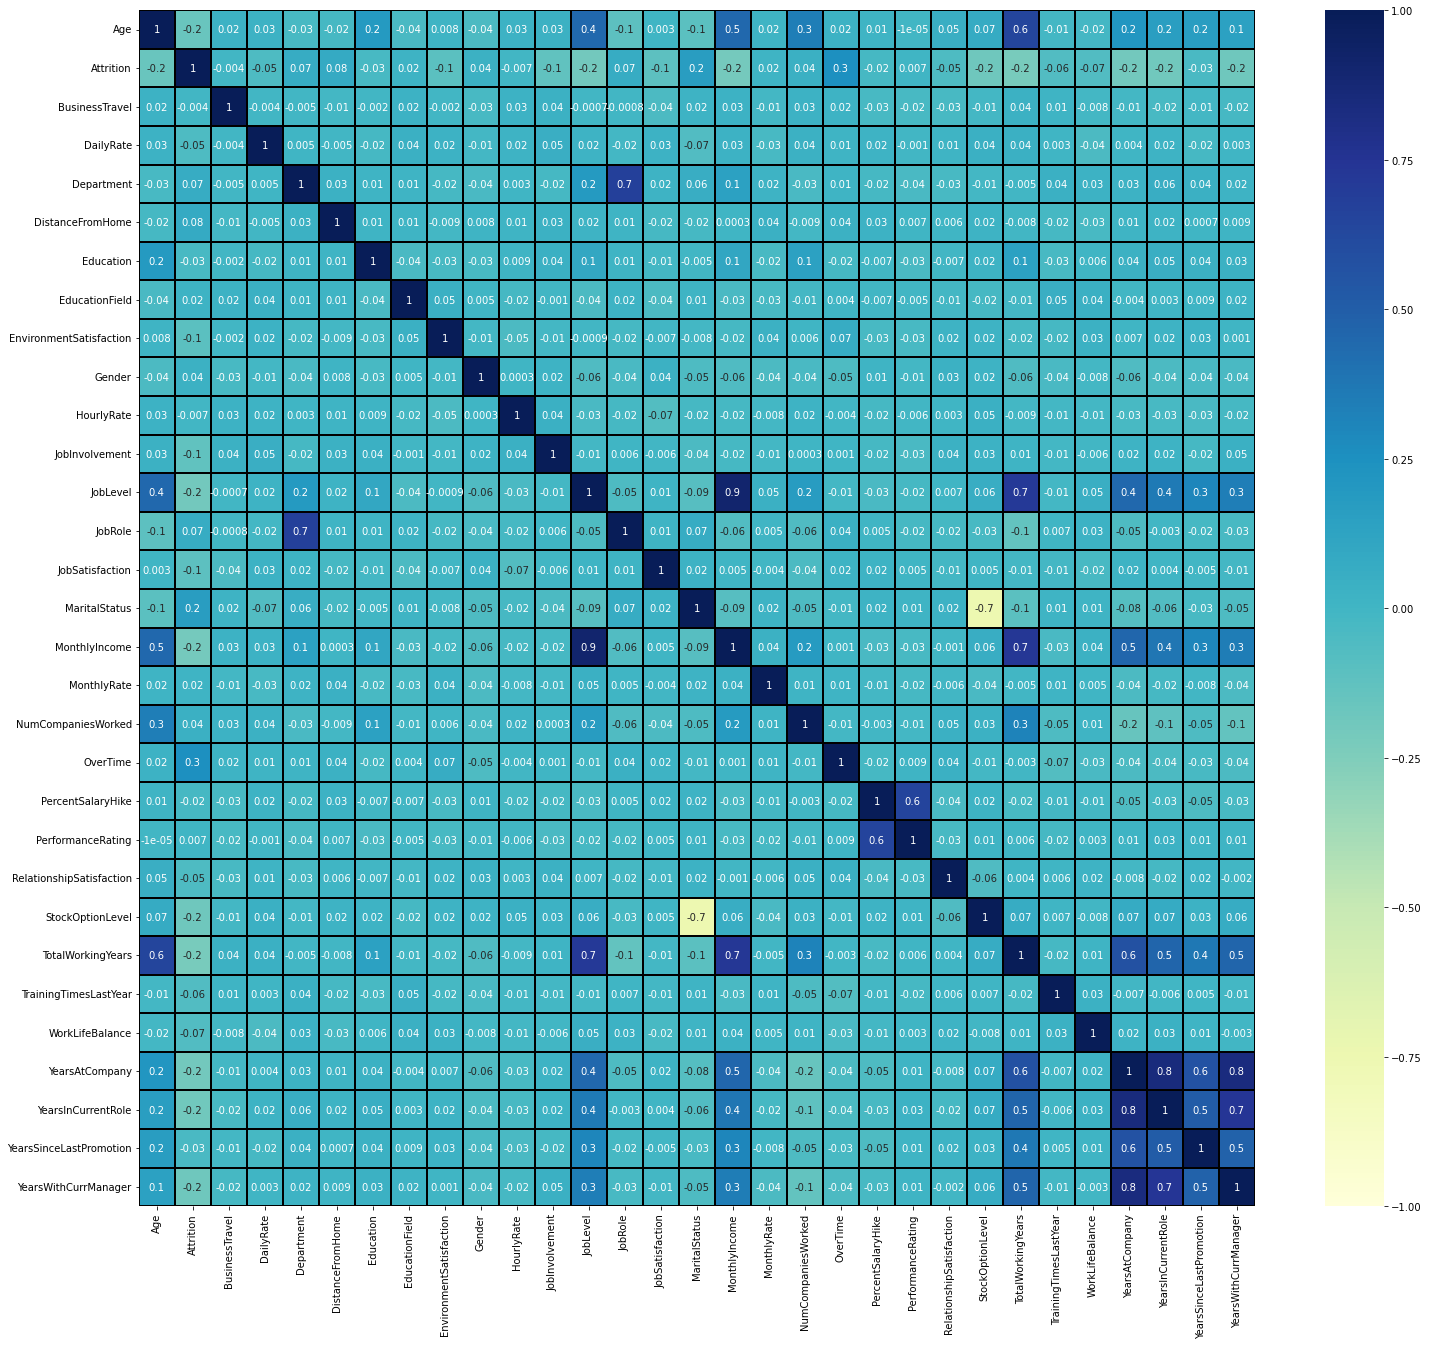

In [110]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(25,22))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="YlGnBu")
plt.yticks(rotation=0);

In [111]:
cor['Attrition'].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.254515
MaritalStatus               0.164073
DistanceFromHome            0.082871
JobRole                     0.068454
Department                  0.065087
NumCompaniesWorked          0.041504
Gender                      0.036980
EducationField              0.022918
MonthlyRate                 0.015296
PerformanceRating           0.006577
BusinessTravel             -0.003866
HourlyRate                 -0.006615
PercentSalaryHike          -0.022353
Education                  -0.030505
YearsSinceLastPromotion    -0.034600
RelationshipSatisfaction   -0.051555
DailyRate                  -0.052820
TrainingTimesLastYear      -0.064856
WorkLifeBalance            -0.066624
EnvironmentSatisfaction    -0.107391
JobSatisfaction            -0.113010
JobInvolvement             -0.128799
Age                        -0.163270
StockOptionLevel           -0.179781
YearsWithCurrManager       -0.185812
YearsInCurrentRole         -0.189039
J

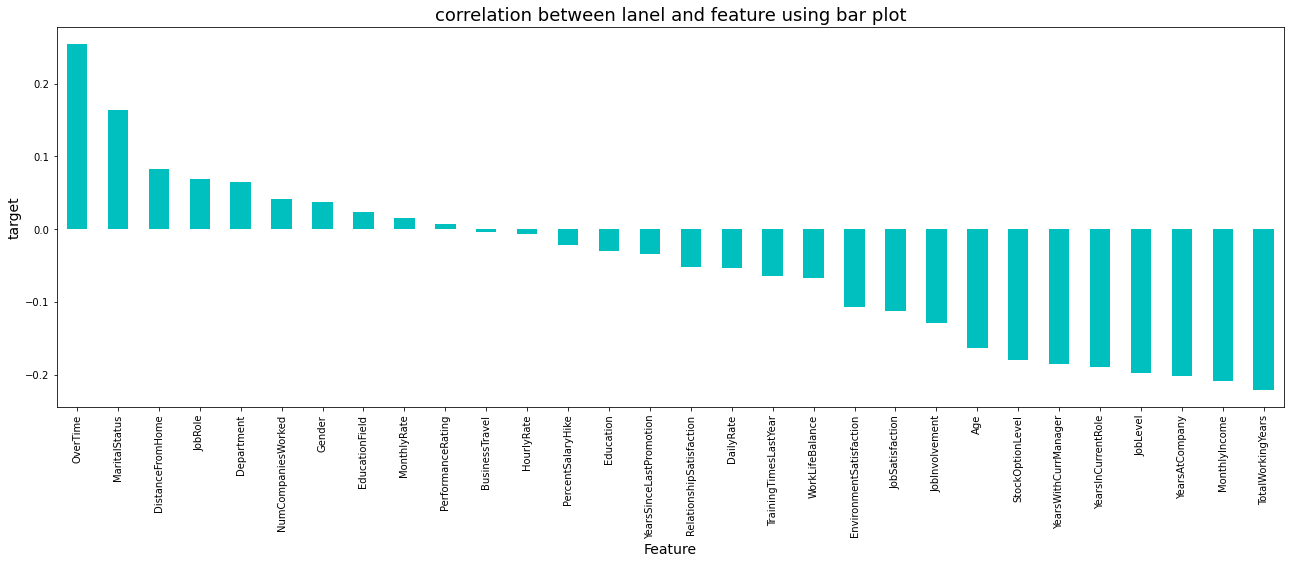

In [112]:
#Visualizing the correlation between label and features using bar plot
plt.figure(figsize=(22,7))
new_df.corr()['Attrition'].sort_values(ascending=False).drop(['Attrition']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between lanel and feature using bar plot',fontsize=18)
plt.show()

In [113]:
#Dropping irrelevant columns
new_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,-1.492909,2,1,2,0,...,3,1,-1.087037,-0.220968,-2.601318,1,0.170026,0.236634,0,0.523995
1,49,0,1,279,1,0.241252,1,1,3,1,...,4,4,0.544888,0.091603,0.218828,3,0.839716,0.917776,1,0.944624
2,37,1,2,1373,1,-1.031930,2,4,4,1,...,3,2,-1.087037,-0.394268,0.218828,3,-2.174311,-1.588896,0,-1.544662
3,33,0,1,1392,1,-0.701966,4,1,4,0,...,3,3,-1.087037,-0.220968,0.218828,3,0.535789,0.917776,3,-1.544662
4,27,0,2,591,1,-1.031930,1,3,1,1,...,3,4,0.544888,-0.582124,0.218828,3,-0.950177,-0.421144,2,-0.380409


In [114]:
#Separating the features and label variables into x and y
x = new_df.drop("Attrition", axis=1)
y = new_df["Attrition"]

In [115]:
# Dimension of x
x.shape

(1434, 30)

In [116]:
# Dimension of y
y.shape

(1434,)

In [117]:
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,-1.492909,2,1,2,0,94,...,3,1,-1.087037,-0.220968,-2.601318,1,0.170026,0.236634,0,0.523995
1,49,1,279,1,0.241252,1,1,3,1,61,...,4,4,0.544888,0.091603,0.218828,3,0.839716,0.917776,1,0.944624
2,37,2,1373,1,-1.031930,2,4,4,1,92,...,3,2,-1.087037,-0.394268,0.218828,3,-2.174311,-1.588896,0,-1.544662
3,33,1,1392,1,-0.701966,4,1,4,0,56,...,3,3,-1.087037,-0.220968,0.218828,3,0.535789,0.917776,3,-1.544662
4,27,2,591,1,-1.031930,1,3,1,1,40,...,3,4,0.544888,-0.582124,0.218828,3,-0.950177,-0.421144,2,-0.380409


In [118]:
y.value_counts()

0    1201
1     233
Name: Attrition, dtype: int64

In [123]:
x = new_df.drop("Attrition", axis=1)
y = new_df["Attrition"]

In [124]:
# Dimension of x
x.shape

(1434, 30)

In [125]:
# Dimension of y
y.shape

(1434,)

In [126]:
x.head()


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,-1.492909,2,1,2,0,94,...,3,1,-1.087037,-0.220968,-2.601318,1,0.170026,0.236634,0,0.523995
1,49,1,279,1,0.241252,1,1,3,1,61,...,4,4,0.544888,0.091603,0.218828,3,0.839716,0.917776,1,0.944624
2,37,2,1373,1,-1.031930,2,4,4,1,92,...,3,2,-1.087037,-0.394268,0.218828,3,-2.174311,-1.588896,0,-1.544662
3,33,1,1392,1,-0.701966,4,1,4,0,56,...,3,3,-1.087037,-0.220968,0.218828,3,0.535789,0.917776,3,-1.544662
4,27,2,591,1,-1.031930,1,3,1,1,40,...,3,4,0.544888,-0.582124,0.218828,3,-0.950177,-0.421144,2,-0.380409


In [127]:
y.value_counts()

0    1201
1     233
Name: Attrition, dtype: int64

In [128]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.504883,0.591425,0.733129,1.407209,-1.492909,-0.882323,-0.938359,-0.660615,-1.220485,1.385422,...,-0.425698,-1.585756,-1.087037,-0.220968,-2.601318,-2.494348,0.170026,0.236634,-0.680453,0.523995
1,1.407068,-0.912305,-1.305603,-0.498303,0.241252,-1.863898,-0.938359,0.255557,0.819346,-0.240916,...,2.349081,1.196431,0.544888,0.091603,0.218828,0.334355,0.839716,0.917776,-0.351246,0.944624
2,0.053791,0.591425,1.404449,-0.498303,-1.031930,-0.882323,1.309313,1.171728,0.819346,1.286856,...,-0.425698,-0.658361,-1.087037,-0.394268,0.218828,0.334355,-2.174311,-1.588896,-0.680453,-1.544662
3,-0.397301,-0.912305,1.451516,-0.498303,-0.701966,1.080828,-0.938359,1.171728,-1.220485,-0.487331,...,-0.425698,0.269035,-1.087037,-0.220968,0.218828,0.334355,0.535789,0.917776,0.307168,-1.544662
4,-1.073939,0.591425,-0.532718,-0.498303,-1.031930,-1.863898,0.560089,-1.576786,0.819346,-1.275859,...,-0.425698,1.196431,0.544888,-0.582124,0.218828,0.334355,-0.950177,-0.421144,-0.022039,-0.380409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,-0.058982,-0.912305,0.193100,-0.498303,1.408388,-0.882323,0.560089,0.255557,0.819346,-1.226576,...,-0.425698,0.269035,0.544888,0.960666,0.218828,0.334355,-0.046431,-0.421144,-0.680453,-0.022765
1430,0.279337,0.591425,-0.478220,-0.498303,-0.053143,-1.863898,0.560089,1.171728,0.819346,-1.177293,...,-0.425698,-1.585756,0.544888,-0.059648,1.617833,0.334355,0.362348,0.917776,-0.351246,0.944624
1431,-1.073939,0.591425,-1.612775,-0.498303,-0.444358,0.099253,-0.938359,-0.660615,0.819346,1.040441,...,2.349081,-0.658361,0.544888,-0.582124,-2.601318,0.334355,0.170026,-0.421144,-0.680453,-0.022765
1432,1.407068,-0.912305,0.537431,1.407209,-1.031930,0.099253,0.560089,1.171728,0.819346,-0.142350,...,-0.425698,1.196431,-1.087037,0.960666,0.218828,-1.079997,0.694022,0.716343,-0.680453,1.125177


In [129]:
#Checking VIF values
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.910299,Age
1,1.017158,BusinessTravel
2,1.023274,DailyRate
3,2.100028,Department
4,1.014080,DistanceFromHome
5,1.059337,Education
6,1.018868,EducationField
7,1.023241,EnvironmentSatisfaction
8,1.024530,Gender
9,1.021729,HourlyRate


In [130]:
# DataFrame after preprocessing and data cleaning
new_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,-1.492909,2,1,2,0,...,3,1,-1.087037,-0.220968,-2.601318,1,0.170026,0.236634,0,0.523995
1,49,0,1,279,1,0.241252,1,1,3,1,...,4,4,0.544888,0.091603,0.218828,3,0.839716,0.917776,1,0.944624
2,37,1,2,1373,1,-1.031930,2,4,4,1,...,3,2,-1.087037,-0.394268,0.218828,3,-2.174311,-1.588896,0,-1.544662
3,33,0,1,1392,1,-0.701966,4,1,4,0,...,3,3,-1.087037,-0.220968,0.218828,3,0.535789,0.917776,3,-1.544662
4,27,0,2,591,1,-1.031930,1,3,1,1,...,3,4,0.544888,-0.582124,0.218828,3,-0.950177,-0.421144,2,-0.380409


In [131]:
#Modeling
#Finding best random state
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)


Best accuracy is  0.8259860788863109  on Random_state  14


In [132]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=194)

In [134]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score


In [136]:
#Decision Tree Classifier
# Checking Accuracy for Decision Tree Classifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)

#Prediction
predDTC = DTC.predict(x_test)

print(accuracy_score(y_test, predDTC))
print(confusion_matrix(y_test, predDTC))
print(classification_report(y_test,predDTC))

0.7610208816705336
[[310  63]
 [ 40  18]]
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       373
           1       0.22      0.31      0.26        58

    accuracy                           0.76       431
   macro avg       0.55      0.57      0.56       431
weighted avg       0.80      0.76      0.78       431



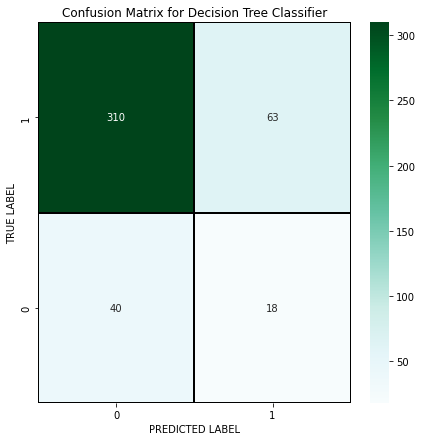

In [138]:

# Lets plot confusion matrix for DTC

cm = confusion_matrix(y_test,predDTC)

x_axis_labels = ["0","1"]
y_axis_labels = ["1","0"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

In [139]:
#Random Forest Classifier
# Checking accuracy for Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

# Prediction
predRFC = RFC.predict(x_test)

print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

0.8793503480278422
[[368   5]
 [ 47  11]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.93       373
           1       0.69      0.19      0.30        58

    accuracy                           0.88       431
   macro avg       0.79      0.59      0.62       431
weighted avg       0.86      0.88      0.85       431



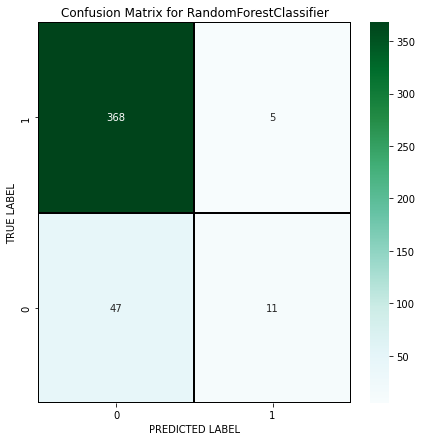

In [140]:
# Lets plot confusion matrix for RandomForestClassifier
cm = confusion_matrix(y_test,predRFC)

x_axis_labels = ["0","1"]
y_axis_labels = ["1","0"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

In [141]:
#Logistic Regression
# Checking accuracy for Logistic Regression Classifier
LR = LogisticRegression()
LR.fit(x_train,y_train)

# Prediction
predLR = LR.predict(x_test)

print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test,predLR))


0.8700696055684455
[[352  21]
 [ 35  23]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       373
           1       0.52      0.40      0.45        58

    accuracy                           0.87       431
   macro avg       0.72      0.67      0.69       431
weighted avg       0.86      0.87      0.86       431



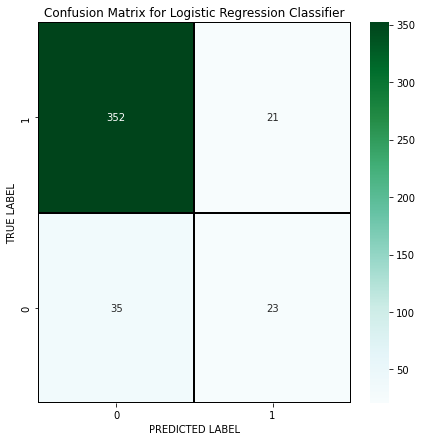

In [142]:
# Lets plot confusion matrix for Logistic Regression
cm = confusion_matrix(y_test,predLR)

x_axis_labels = ["0","1"]
y_axis_labels = ["1","0"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

In [144]:
#Support Vector Machine Classifier
# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_train,y_train)

# Prediction
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.8677494199535963
[[361  12]
 [ 45  13]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       373
           1       0.52      0.22      0.31        58

    accuracy                           0.87       431
   macro avg       0.70      0.60      0.62       431
weighted avg       0.84      0.87      0.84       431



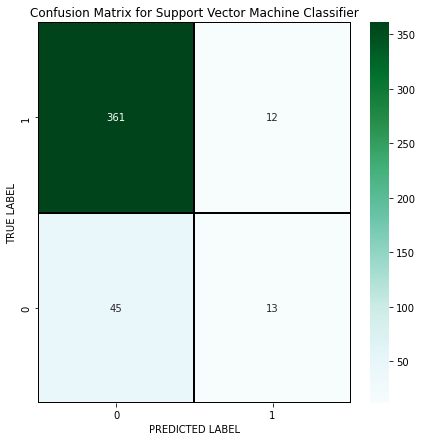

In [145]:
# Lets plot confusion matrix for Support Vector Machine Classifier
cm = confusion_matrix(y_test,predsvc)

x_axis_labels = ["0","1"]
y_axis_labels = ["1","0"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.show()

In [146]:
#KNeighbors Classifier
# Checking accuracy for KNeighbors Classifier
knn = KNN()
knn.fit(x_train,y_train)

# Prediction
predknn = knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))

0.8747099767981439
[[369   4]
 [ 50   8]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       373
           1       0.67      0.14      0.23        58

    accuracy                           0.87       431
   macro avg       0.77      0.56      0.58       431
weighted avg       0.85      0.87      0.84       431



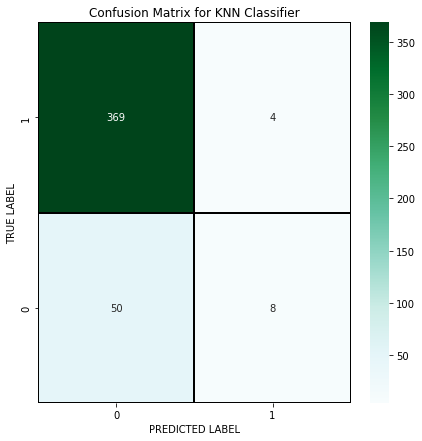

In [147]:
# Lets plot confusion matrix for KNN Classifier
cm = confusion_matrix(y_test,predknn)

x_axis_labels = ["0","1"]
y_axis_labels = ["1","0"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN Classifier')
plt.show()


In [148]:
#Gradient Boosting Classifier
# Checking accuracy for Gradient Boosting Classifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)

# Prediction
predGB = GB.predict(x_test)

print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test,predGB))


0.8538283062645011
[[351  22]
 [ 41  17]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       373
           1       0.44      0.29      0.35        58

    accuracy                           0.85       431
   macro avg       0.67      0.62      0.63       431
weighted avg       0.83      0.85      0.84       431



In [ ]:
The accuracy using Gradient Boosting Classifier is 85%.

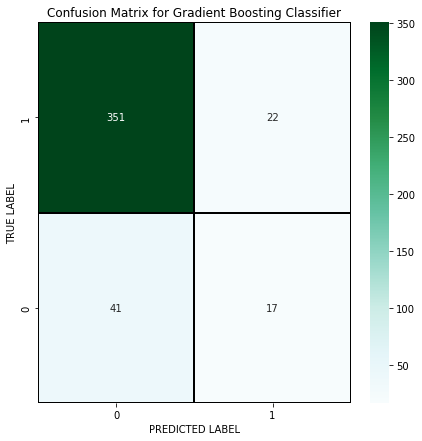

In [149]:
# Lets plot confusion matrix for Gradient Boosting Classifier
cm = confusion_matrix(y_test,predGB)

x_axis_labels = ["0","1"]
y_axis_labels = ["1","0"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

In [150]:
#AdaBoost Classifier
# Checking accuracy for AdaBoost Classifier
ABC = AdaBoostClassifier()
ABC.fit(x_train,y_train)

# Prediction
predABC = ABC.predict(x_test)

print(accuracy_score(y_test, predABC))
print(confusion_matrix(y_test, predABC))
print(classification_report(y_test,predABC))

0.8561484918793504
[[344  29]
 [ 33  25]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       373
           1       0.46      0.43      0.45        58

    accuracy                           0.86       431
   macro avg       0.69      0.68      0.68       431
weighted avg       0.85      0.86      0.85       431



In [ ]:
#The accuracy using AdaBoost Classifier is 86%.

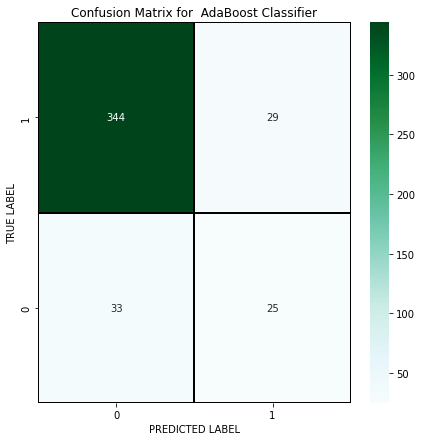

In [151]:
# Lets plot confusion matrix for  AdaBoost Classifier
cm = confusion_matrix(y_test,predABC)

x_axis_labels = ["0","1"]
y_axis_labels = ["1","0"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  AdaBoost Classifier')
plt.show()

In [152]:
#Checking the Cross Validation Score
from sklearn.model_selection import cross_val_score

In [153]:
# cv score for Decision Tree Classifier
print(cross_val_score(DTC,x,y,cv=5).mean())

0.78032942667089


In [154]:
# cv score for Random Forest Classifier
print(cross_val_score(RFC,x,y,cv=5).mean())

0.8570356472795497


In [155]:
# cv score for Logistic Regression Classifier
print(cross_val_score(LR,x,y,cv=5).mean())

0.8821519943471163


In [156]:
# cv score for Support Vector  Classifier
print(cross_val_score(svc,x,y,cv=5).mean())

0.8682074023537438


In [157]:
# cv score for KNN Classifier
print(cross_val_score(knn,x,y,cv=5).mean())

0.8479812870056772


In [158]:
# cv score for Gradient Boosting Classifier
print(cross_val_score(GB,x,y,cv=5).mean())


0.8626300528739554


In [159]:
# cv score for AdaBoosting Classifier
print(cross_val_score(ABC,x,y,cv=5).mean())


0.8800638386004239


In [160]:
#From the difference of both accuracy score and Cross Validation score we can conclude that Kneighbors as our best fitting mode

In [161]:
#Hyperparameter Tuning

In [162]:
from sklearn.model_selection import GridSearchCV
 # KNN classifier
parameters = {'n_neighbors':[2,3,4,5,6],
              'weights':['uniform','distance'],
              'leaf_size':[10,100],
              'algorithm':['auto','ball_tree','kd_tree','brute']}

In [163]:
GCV=GridSearchCV(KNN(),parameters,cv=5)

In [164]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 100], 'n_neighbors': [2, 3, 4, 5, 6],
                         'weights': ['uniform', 'distance']})

In [165]:
GCV.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 5, 'weights': 'uniform'}

In [166]:
Attrition = KNN(algorithm='auto', leaf_size=10, n_neighbors=2, weights='uniform')
Attrition.fit(x_train, y_train)
pred = Attrition.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

85.61484918793504


In [167]:
#The accuracy of the best model increased after tuning and giving 86% accuracy.

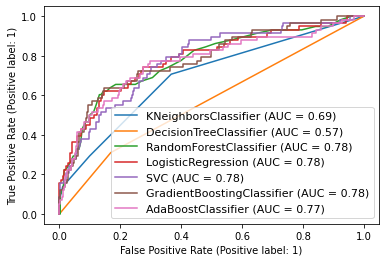

In [168]:
#Plotting ROC and compare AUC for all the models used
# Plotting for all the models used here
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 


disp = plot_roc_curve(knn,x_test,y_test)
plot_roc_curve(DTC, x_test, y_test, ax=disp.ax_)     # ax_=Axes with confusion matrix
plot_roc_curve(RFC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(LR, x_test, y_test, ax=disp.ax_)
plot_roc_curve(svc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(GB, x_test, y_test, ax=disp.ax_)
plot_roc_curve(ABC, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

In [169]:
#This is the AUC-ROC curve for the models taht we have used and is plotted False positive rate against True positive rate.

In [170]:
# Saving the model using .pkl
import joblib
joblib.dump(Attrition,"HR analytics_Attrtion.pkl")

['HR analytics_Attrtion.pkl']

In [172]:
# Let's load the saved model and get the prediction

# Loading the saved model
model=joblib.load("HR analytics_Attrtion.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [173]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,...,421,422,423,424,425,426,427,428,429,430
Predicted,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Original,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
